# Essential Math For AI- Notes on Chapter 5

## Filtering Images Using Gabor Filters

The function of a Gabor filter is a two dimensional Gaussian times a sine wave.
We use two dimensional convolution to filter images using gabor filters.

The discrete function, which we need for filtering images is (from https://en.wikipedia.org/wiki/Gabor_filter):

![image](Fig_Gabor_formulas.svg)
![image](Fig_Gabor_formula.svg)

 f is the frequency that is desired in the texture. By varying $\theta$, we can look for texture oriented in a particular direction. By varying $\sigma$ , we change the support of the basis or the size of the image region being analyzed. B and C are normalizing constants.
 
### Extra information 

https://homepages.inf.ed.ac.uk/rbf/CAVIAR/PAPERS/05-ibpria-features.pdf 
https://inc.ucsd.edu/mplab/75/media//gabor.pdf
https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gabor_kernel

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (2789, 2039, 3)
Image Height 2789
Image Width 2039
Dimension of Image 3


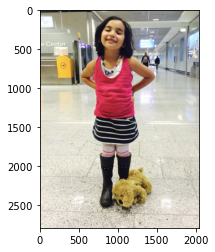

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

# Read the image file. It will be saved as 3 dimensional array, one layer for each channel.
picture = plt.imread("Fig_Sary.jpg")
# Let's see how python saves this image file
print('Type of the image : ' , type(picture))
print(f'Shape of the image : {picture.shape}')
print(f'Image Height {picture.shape[0]}')
print(f'Image Width {picture.shape[1]}')
print(f'Dimension of Image {picture.ndim}')
# Let's display the image
plt.imshow(picture)

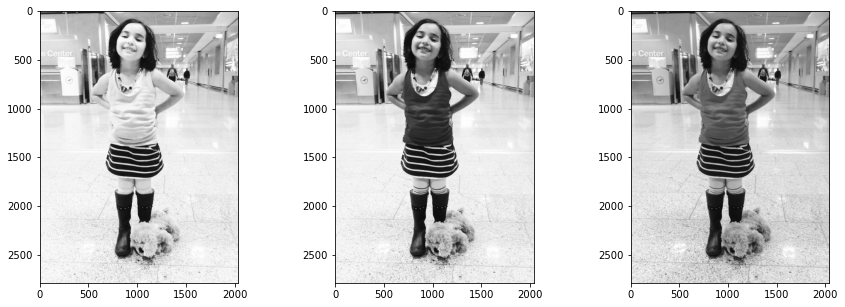

In [23]:
# Save each channel in its own two dimensional matrix
R=picture[:,:,0] # red channel
G=picture[:,:,1] # green channel
B=picture[:,:,2] # blue channel
# Let's display these three channels. I will plot first two on grey scale and the third on color scale
fig,subs = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
subs[0].imshow(R,cmap=cm.Greys_r)
subs[1].imshow(G,cmap=cm.Greys_r)
subs[2].imshow(B,cmap=cm.Greys_r)

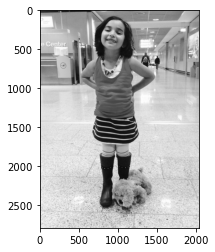

In [24]:
# covert the initial image to grayscale
# this means that rgb channels are equal (the output should have integer values between 0-255)
r1=np.around(0.2989*R+0.5870*G+0.1140*B)
r1=r1.astype(int)
g1=np.around(0.2989*R+0.5870*G+0.1140*B)
g1=g1.astype(int)
b1=np.around(0.2989*R+0.5870*G+0.1140*B)
b1=g1.astype(int)
gray_image=np.dstack((r1,g1,b1))
plt.imshow(gray_image)

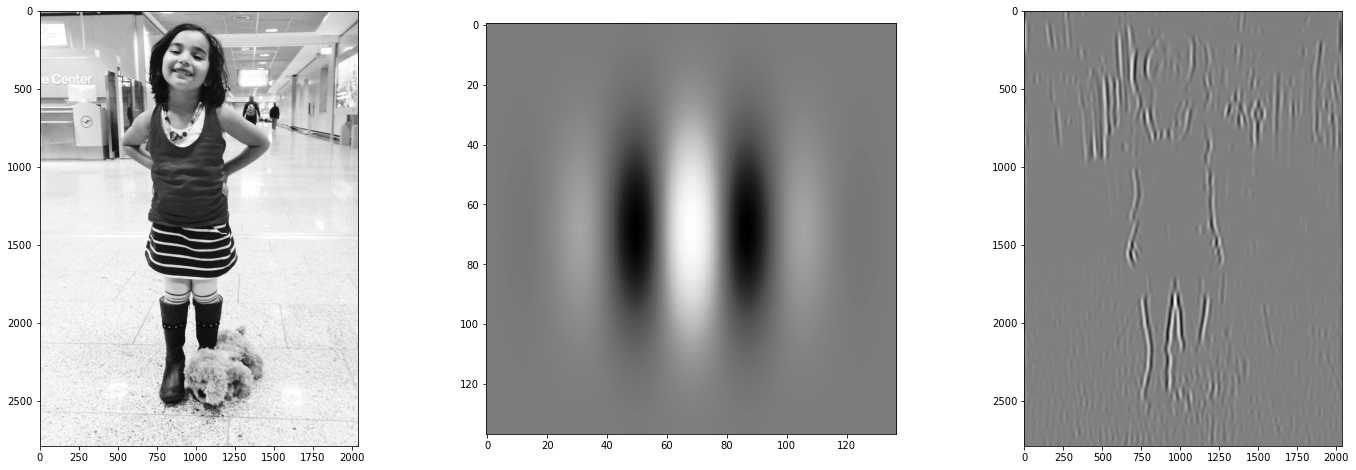

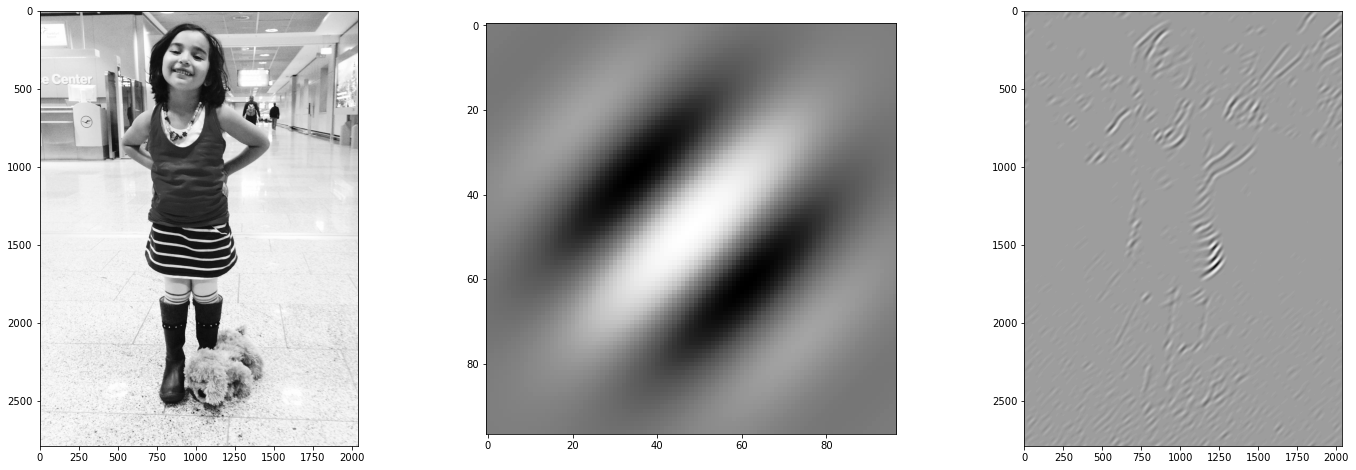

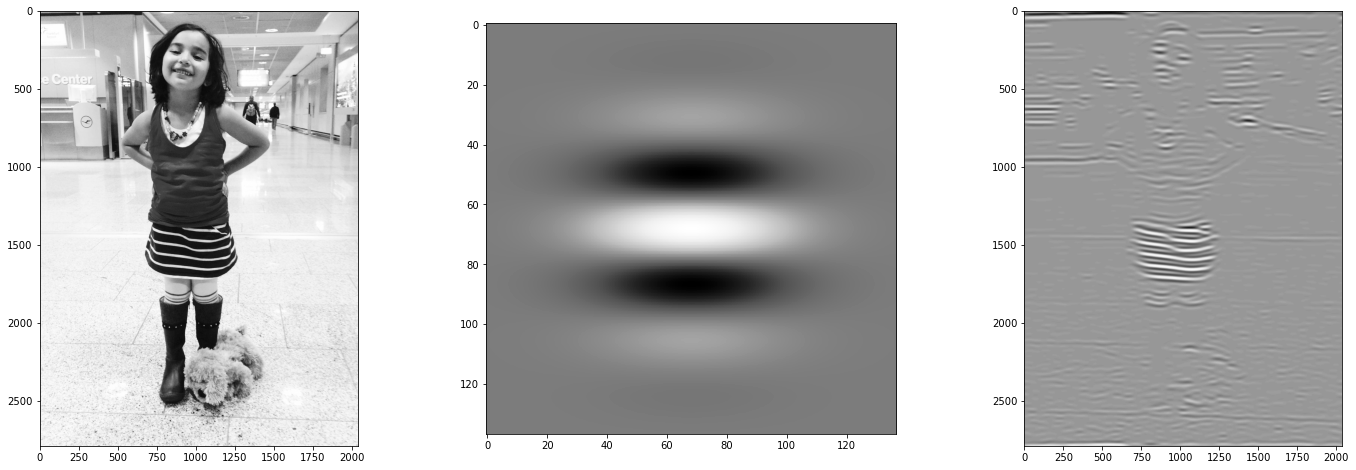

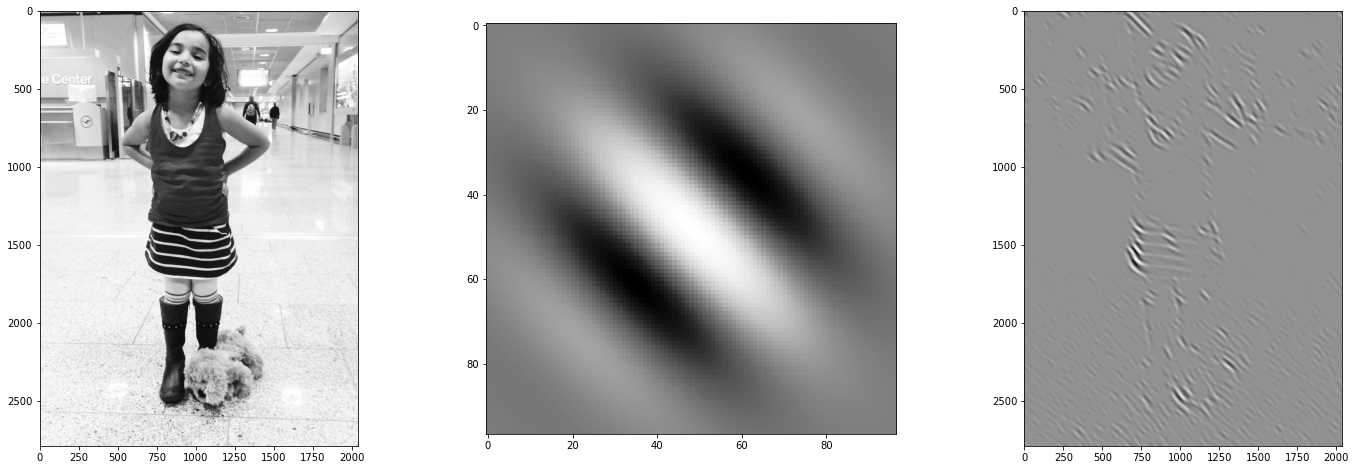

In [40]:
from scipy import ndimage as ndi #multidimensional image processing, we will use convolution from here
from skimage.filters import gabor_kernel

# choose the frequency desired in the texture 
frequency=0.025 
# f=0.05 captured nice texture for grayscale image 
# f=0.1 for green channel 

# create the filter with the chosen frequency and different orientations
filter_matrix_0=gabor_kernel(frequency, theta=0, bandwidth=1, dtype=np.complex128)
filter_matrix_45=gabor_kernel(frequency, theta=np.pi/4, bandwidth=1, dtype=np.complex128)
filter_matrix_90=gabor_kernel(frequency, theta=np.pi/2, bandwidth=1, dtype=np.complex128)
filter_matrix_135=gabor_kernel(frequency, theta=3*np.pi/4, bandwidth=1, dtype=np.complex128)

# get the real part of the filter
filter_matrix_0=np.real(filter_matrix_0)
filter_matrix_45=np.real(filter_matrix_45)
filter_matrix_90=np.real(filter_matrix_90)
filter_matrix_135=np.real(filter_matrix_135)

# choose the image to filter
#image=G # the green channel
image=r1 # one channel of the grayscale image (all channels are equal anyway)

# filter the image by convolution with each filter
filtered_image_0= ndi.convolve(image, filter_matrix_0, mode='wrap')
filtered_image_45= ndi.convolve(image, filter_matrix_45, mode='wrap')
filtered_image_90= ndi.convolve(image, filter_matrix_90, mode='wrap')
filtered_image_135= ndi.convolve(image, filter_matrix_135, mode='wrap')

fig,subs = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
subs[0].imshow(G,cmap=cm.Greys_r)
subs[1].imshow(filter_matrix_0,cmap=cm.Greys_r)
subs[2].imshow(filtered_image_0,cmap=cm.Greys_r)

fig,subs = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
subs[0].imshow(G,cmap=cm.Greys_r)
subs[1].imshow(filter_matrix_45,cmap=cm.Greys_r)
subs[2].imshow(filtered_image_45,cmap=cm.Greys_r)

fig,subs = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
subs[0].imshow(G,cmap=cm.Greys_r)
subs[1].imshow(filter_matrix_90,cmap=cm.Greys_r)
subs[2].imshow(filtered_image_90,cmap=cm.Greys_r)

fig,subs = plt.subplots(nrows=1, ncols=3, figsize=(25,8))
subs[0].imshow(G,cmap=cm.Greys_r)
subs[1].imshow(filter_matrix_135,cmap=cm.Greys_r)
subs[2].imshow(filtered_image_135,cmap=cm.Greys_r)